##  What are callbacks?
In Dash, callbacks are defined functionality within an app that are triggered by user interaction. Specifically, a user interacts with an element which triggers a Python function, and this function will cause a change in the app. This allows us to create interactive user experiences within our apps.

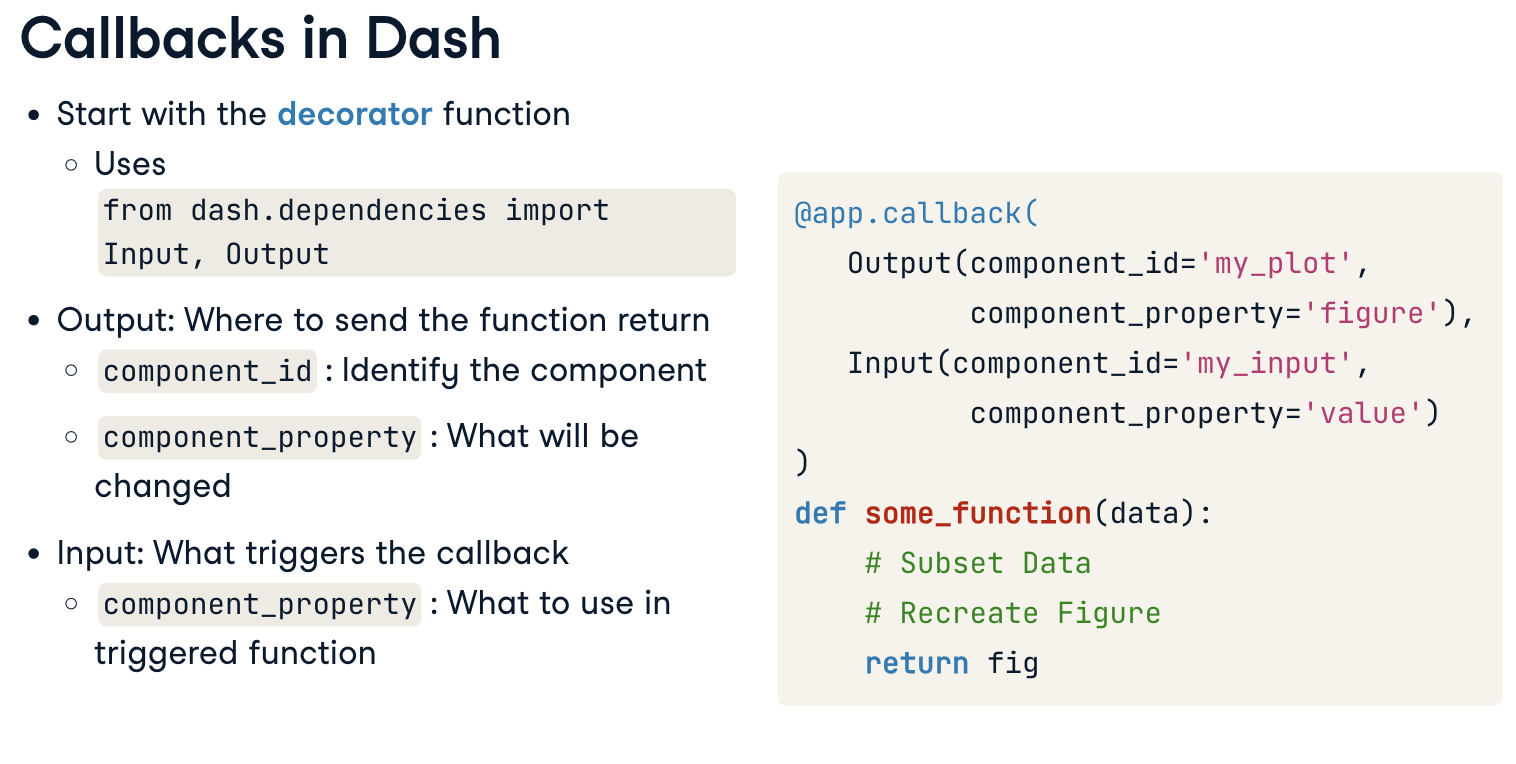

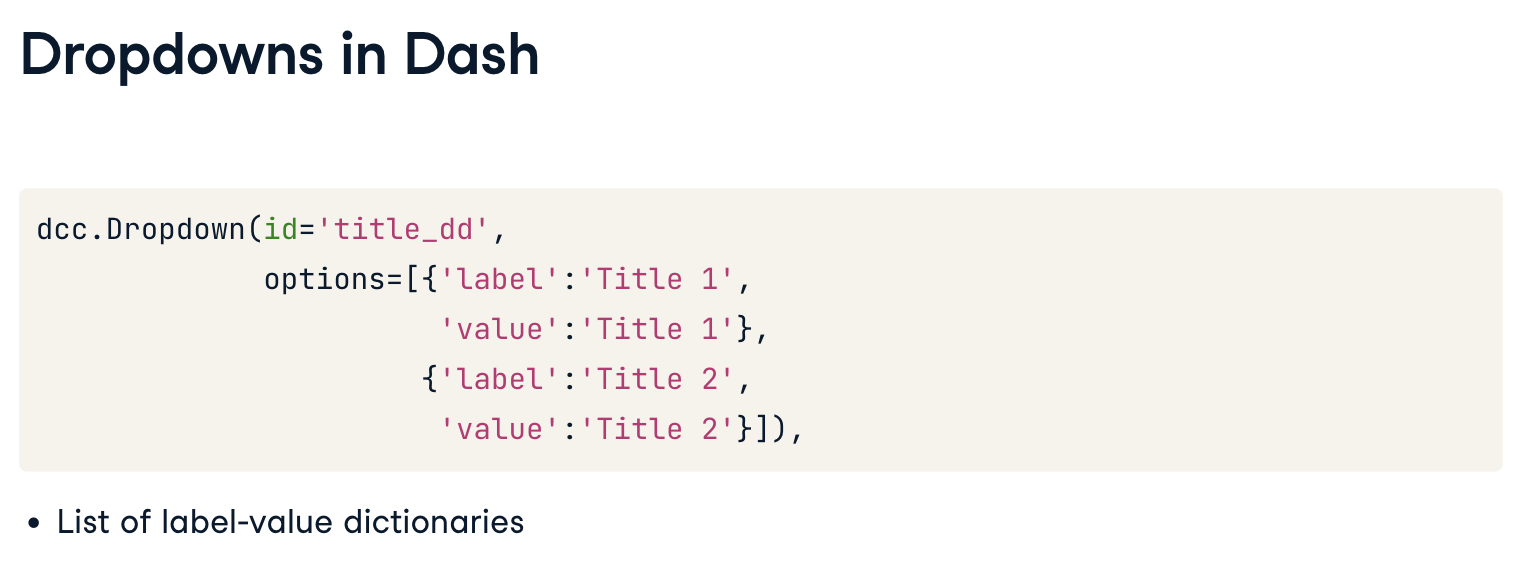

- Label : What the user sees
- Value: Is what I sent to a callback 

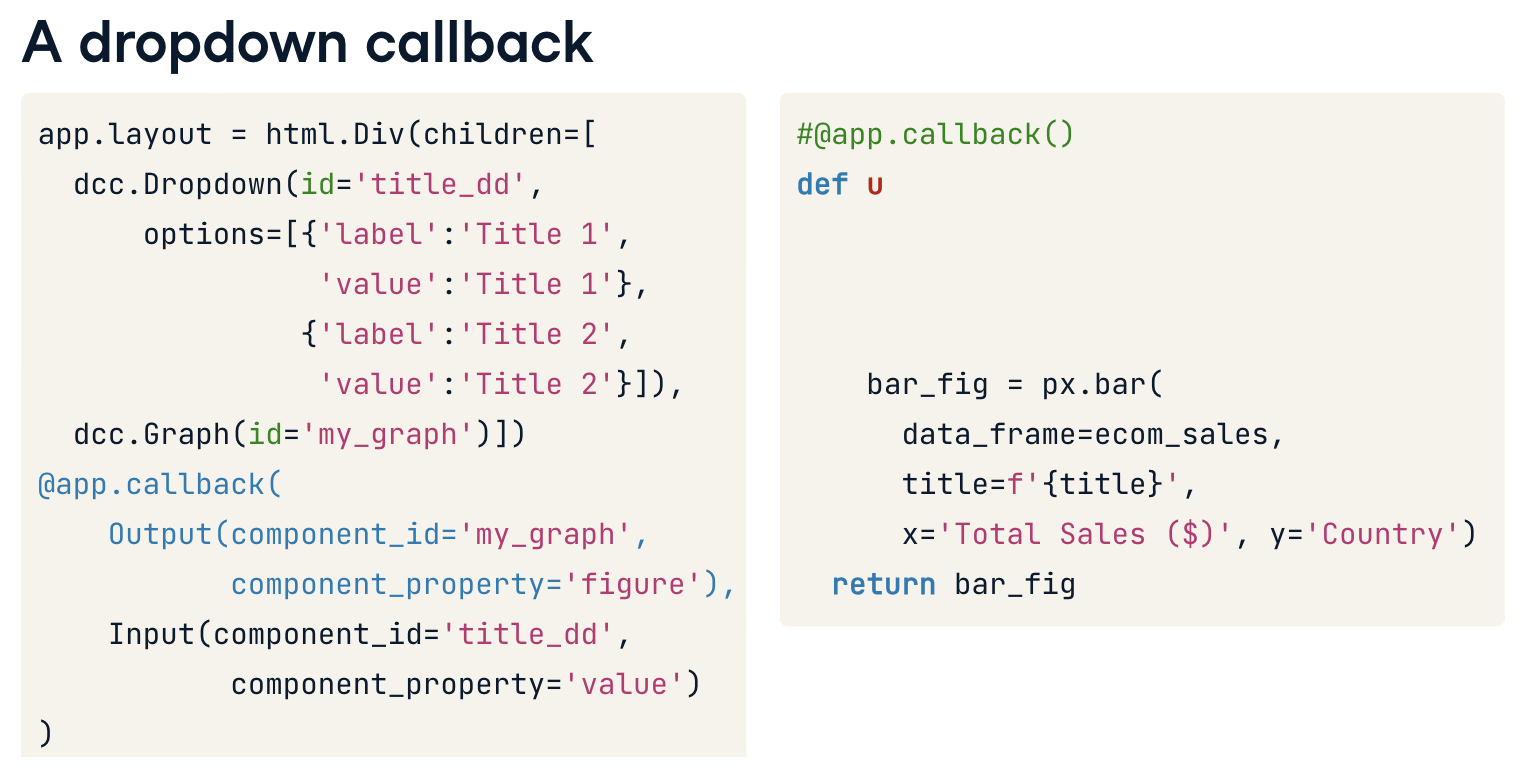

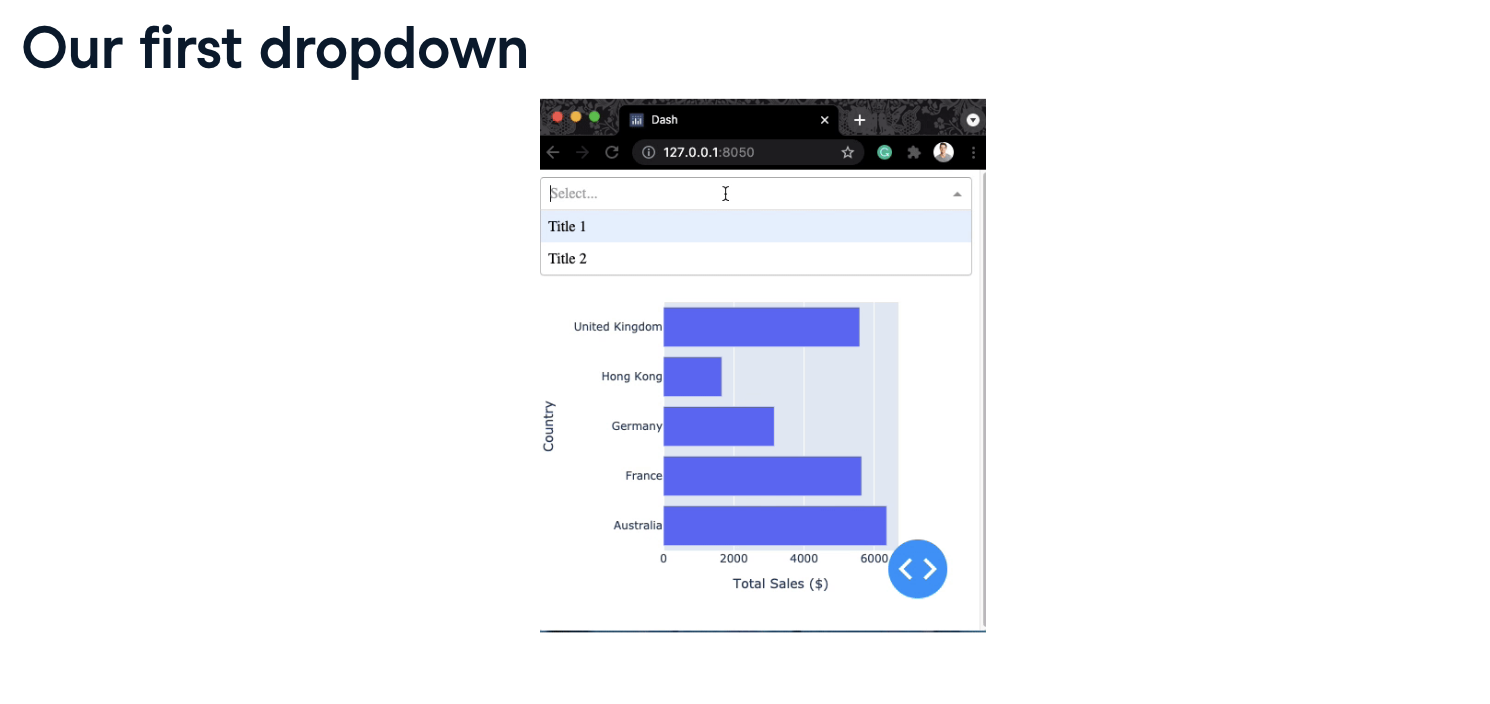

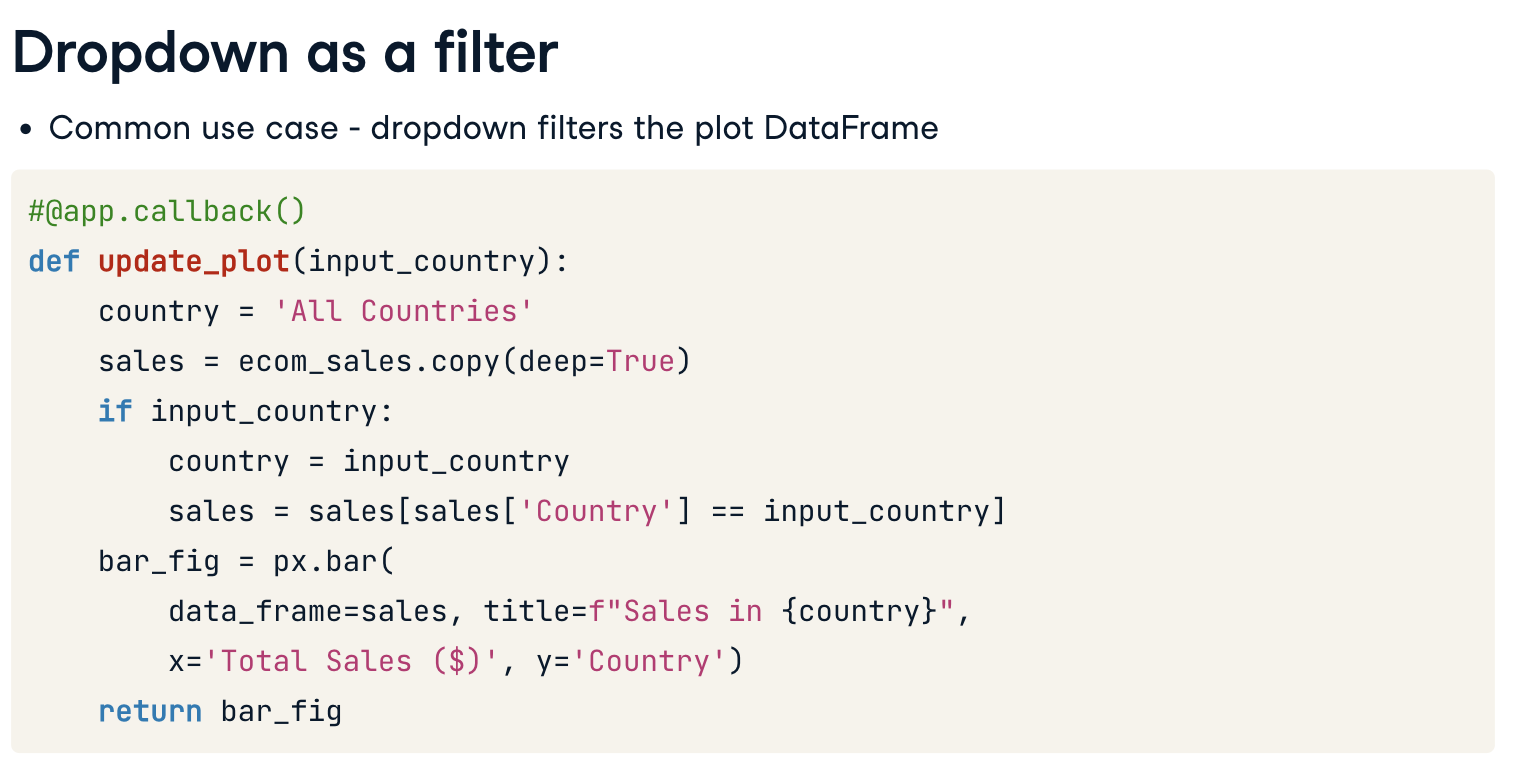

## Exercise 
### A dropdown for sales by country
As you were working away at your desk, the global sales manager for the global e-commerce company visited with a new data viz challenge. She noted that the recent sales graphs you produced were interesting, but she wanted to be able to filter and focus on only one country at a time and see the category aggregation data update.

You gladly accept the challenge, comforted that your expertise in Dash callbacks will be just the thing to breathe some interactive life into your Dash app.

The manager noted that it is important to use the corporately approved, abbreviated country names in the dropdown:

UK = United Kingdom, GM = Germany, FR = France, AUS = Australia, HK = Hong Kong.

In [2]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
from dash.dependencies import Input, Output

# Creating a sample 'ecom_sales' DataFrame
data = {
    'Major Category': ['Clothes', 'Kitchen', 'Garden', 'Household', 'Clothes', 'Kitchen'],
    'Minor Category': ['Shirts', 'Cookware', 'Tools', 'Cleaning', 'Dresses', 'Cutlery'],
    'Country': ['United Kingdom', 'Germany', 'France', 'Australia', 'Hong Kong', 'United Kingdom'],
    'OrderValue': [15000, 18000, 22000, 20000, 24000, 21000]
}

ecom_sales = pd.DataFrame(data)

logo_link = 'logo.png'

app = dash.Dash(__name__)

app.layout = html.Div([
  html.Img(src=logo_link,style={'margin':'30px 0px 0px 0px' }),
  html.H1('Sales breakdowns'),
  html.Div(
    children=[
    html.Div(
        children=[
        html.H2('Controls'),
        html.Br(),
        html.H3('Country Select'),
        # Add a dropdown with identifier
        dcc.Dropdown(id='country_dd',
        # Set the available options with noted labels and values
        options=[
            {'label':'UK', 'value':'United Kingdom'},
            {'label':'GM', 'value':'Germany'},
            {'label':'FR', 'value':'France'},
            {'label':'AUS', 'value':'Australia'},
            {'label':'HK', 'value':'Hong Kong'}],
            style={'width':'200px', 'margin':'0 auto'})
        ],
        style={'width':'350px', 'height':'350px', 'display':'inline-block', 'vertical-align':'top', 'border':'1px solid black', 'padding':'20px'}),
        
    html.Div(children=[
            # Add a graph component with identifier
            dcc.Graph(id='major_cat'),
            html.H2('Major Category', 
            style={ 'border':'2px solid black', 'width':'200px', 'margin':'0 auto'})
            ],
            style={'width':'700px','display':'inline-block'}
             ),
    ])], 
  style={'text-align':'center', 'display':'inline-block', 'width':'100%'}
  )

@app.callback(
    # Set the input and output of the callback to link the dropdown to the graph
    Output(component_id='major_cat', component_property='figure'),
    Input(component_id='country_dd', component_property='value')
)

def update_plot(input_country):
    country_filter = 'All Countries'
    sales = ecom_sales.copy(deep=True)
    
    if input_country:
        country_filter = input_country
        sales = sales[sales['Country'] == country_filter]
        
    ecom_bar_major_cat = sales.groupby('Major Category')['OrderValue'].agg('sum').reset_index(name='Total Sales ($)')
    bar_fig_major_cat = px.bar(
        title=f'Sales in {country_filter}', data_frame=ecom_bar_major_cat, x='Total Sales ($)', y='Major Category', color='Major Category',
                 color_discrete_map={'Clothes':'blue','Kitchen':'red','Garden':'green','Household':'yellow'})
    return bar_fig_major_cat


if __name__ == '__main__':
    app.run_server(port=60304, debug=True)